# XG325: Explainable Artificial Intelligence
    
## Exercise 2

**Week 07 | Lecture 03**

_Saturday, April 13, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import tensorflow

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Example (Simple Neural Network)

In [2]:
(trainval_x, trainval_y), (test_x, test_y) = tensorflow.keras.datasets.mnist.load_data()
trainval_x.shape, trainval_x.dtype

((60000, 28, 28), dtype('uint8'))

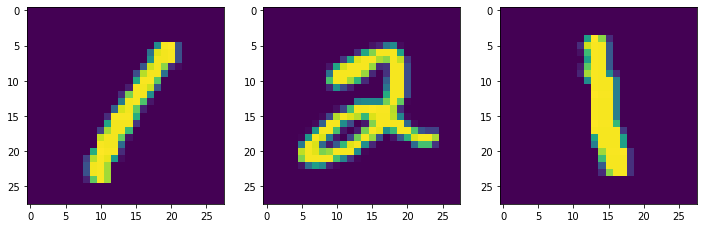

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(trainval_x[3])
axes[1].imshow(trainval_x[5])
axes[2].imshow(trainval_x[6])
plt.show()

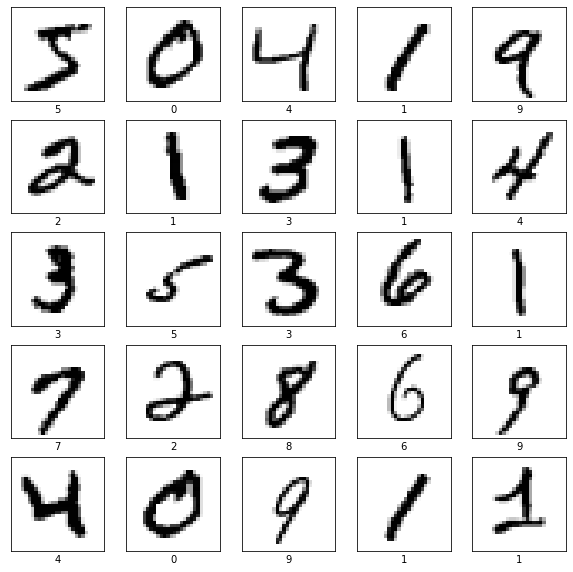

In [4]:
"""Preprocessing"""
trainval_x = trainval_x/255.0
test_x = test_x/255.0

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainval_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainval_y[i]])
plt.show()

In [5]:
# Create random indices
numpy.random.seed(44)
N = len(trainval_x)
shuffled_indices = numpy.random.permutation(N)

# Split indices into train, validation and test sets
train_indices = shuffled_indices[:int(N*0.8)]
valid_indices = shuffled_indices[int(N*0.8):]

#  Split data into train, validation and test sets
train_x = trainval_x[train_indices]
valid_x = trainval_x[valid_indices]
train_y = trainval_y[train_indices]
valid_y = trainval_y[valid_indices]

train_x.shape, valid_x.shape, test_x.shape, train_y.shape, valid_y.shape, test_y.shape

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000,),
 (12000,),
 (10000,))

## Simple Neural Network

In [6]:
"""Build model"""
onelayer = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(28, 28)),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])

onelayer.compile(
    optimizer='adam',
    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

onelayer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""Train"""
onelayer.fit(train_x, train_y, epochs=3, validation_data=(valid_x,  valid_y))

Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2899 - accuracy: 0.9180 - val_loss: 0.1692 - val_accuracy: 0.9503
Epoch 2/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1273 - accuracy: 0.9626 - val_loss: 0.1229 - val_accuracy: 0.9618
Epoch 3/3
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0878 - accuracy: 0.9747 - val_loss: 0.1059 - val_accuracy: 0.9679


In [8]:
"""Evaluate"""
test_loss, test_acc = onelayer.evaluate(test_x,  test_y, verbose=2)
test_loss, test_acc

313/313 - 0s - loss: 0.0966 - accuracy: 0.9704 - 480ms/epoch - 2ms/step


(0.09655258804559708, 0.9703999757766724)

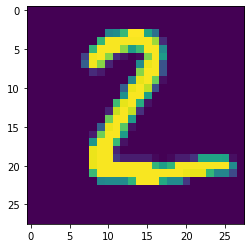

In [9]:
plt.imshow(test_x[1])

In [10]:
pred = onelayer.predict(test_x[1].reshape(-1, 28, 28, 1))
pred

array([[ -2.5635107,   3.389078 ,  10.178717 ,   5.1910925, -15.90954  ,
         -1.0954826,  -0.7697047, -11.119733 ,  -2.0217981, -17.062721 ]],
      dtype=float32)

In [11]:
numpy.argmax(pred), test_y[1]

(2, 2)

## Exercise 2

Design a simple case to illustrate Clever Hans effect.
 1. Add an artefact, that would help the network to classify the numbers (e.g., an extra point in a corner for every 0, an extra point in a different corner for every 1, etc.)
 2. Train your network.
 3. Check how it perform on the test set (check both variants, where you make the same modification to the test set and where you have an original unmodified test set).